**Подключаем библиотеки**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# установка максимальной ширины столбца в символах(сколько символов в ячейке максимально можно увидеть при display)
pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.max_colwidth', None) # чтобы не ограничивать вообще

# настраиваем количество столбцов, выводимых на экран
pd.set_option('display.max_columns', 40)

**Основные концепции Pandas**

- Dataframe = таблица(=двумерный массив) с данными
- Series = столбец(=одномерный массив) с данными. Каждый элемент серии обладает индексом(порядковым номером) или асоциативной меткой
- Index = названия строк(=набор ассоциативных текстовых меток для серии)
- Column = название столбцов


# Работа с сериями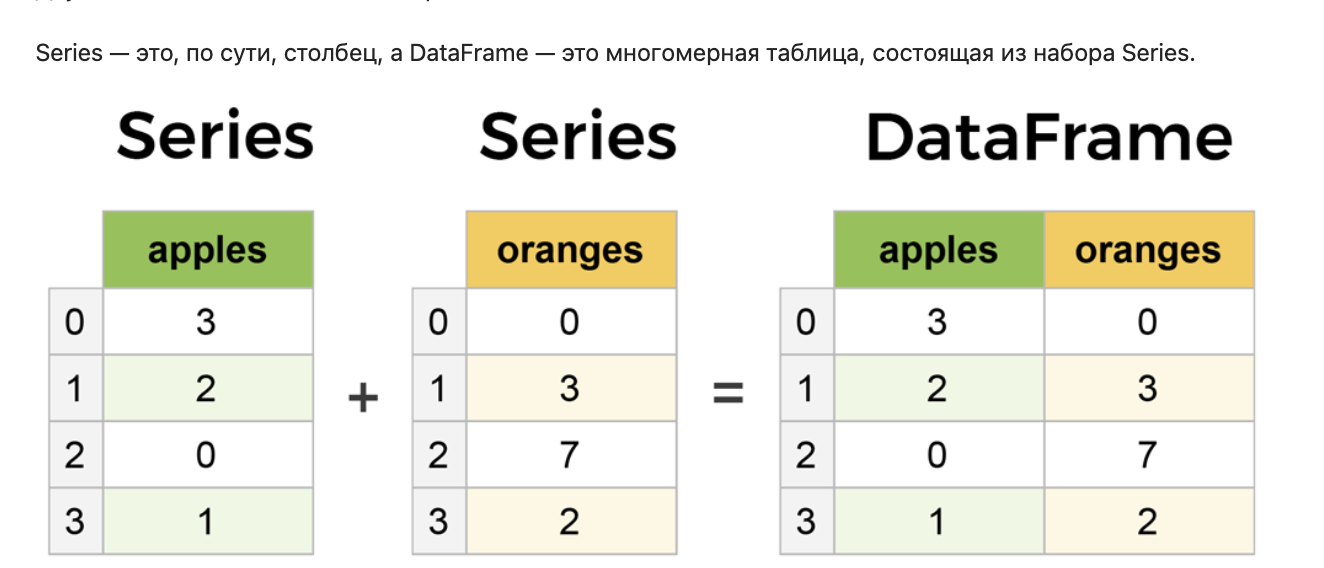

In [ ]:
# Пример 1 работы с серией
# массив data1 - информация о количестве дней в месяце

data1 = pd.Series([31, 28, 31, 30, 31])
print(data1) #индексы в левом столце, значения серии в правом столбце

0    31
1    28
2    31
3    30
4    31
dtype: int64


In [ ]:
# Пример 2
# можно задать серии набор ассоциативных меток(названий), по которым можно будет обращаться к значениям
data2 = pd.Series([31, 28, 31, 30, 31], index=['jan', 'feb', 'mar', 'apr', 'may'])
print(data2)

jan    31
feb    28
mar    31
apr    30
may    31
dtype: int64


In [ ]:
# Пример 3
# в конструктор серии можно передать словарь
mydict = {'Москва': 1500, 'Казань': 900, 'Уфа': 750, 'Мурманск': 600}
data3 = pd.Series(mydict)
data3['Екб'] = 1100  # добавление элемента
data3['Москва'] = 1600  # замена элемента
print(data3)

Москва      1600
Казань       900
Уфа          750
Мурманск     600
Екб         1100
dtype: int64


In [ ]:
# Действия с сериями
print(data3.index)  # массив индексов
print(data3.values)  # массив значений

print('Москва' in data3)  # проверка индекса на наличие в серии

print(data3.loc['Казань'] == data3['Казань'])  # доступ к значению по строковой метке
print(data3.iloc[1] == data3[1])  # доступ к значению по числовому значению

print(data3[2:])  # работают срезы
print(data3['Мурманск':])

print(data3[['Уфа', 'Екб']])  # взятие из серии значений только по перечисленным индексам

Index(['Москва', 'Казань', 'Уфа', 'Мурманск', 'Екб'], dtype='object')
[1600  900  750  600 1100]
True
True
True
Уфа          750
Мурманск     600
Екб         1100
dtype: int64
Мурманск     600
Екб         1100
dtype: int64
Уфа     750
Екб    1100
dtype: int64


/tmp/ipython-input-37-1420908544.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data3.iloc[1] == data3[1])  # доступ к значению по числовому значению


Если вы создаёте серию на основе словаря и указали индекс, которого не существует в словаре, то pandas добавит в серию такой индекс, но значение будет равно NaN (пример про data6)

Если вы создаете серию на основе словаря и не передали все индексы, то никакой ошибки не будет. Пандас добавит в серию только те значения, которые вы указали в индексе (пример про data5)

In [ ]:
mydict = {'Москва': 1500, 'Казань': 900, 'Уфа': 750, 'Мурманск': 600}
# если в конструктору передать словарь и порядок индексов, то данные в серии будут расположены в нужном порядке
data4 = pd.Series(mydict, index=sorted(mydict.keys()))
print(data4)

data5 = pd.Series(mydict, index=['Москва', 'Мурманск']) # можно создавать только частичные серии
print(data5)

data6 = pd.Series(mydict, index=['Москва', 2, 3, 4])  # переданные несуществующие индексы заполнятся значениями NaN
print(data6)

Казань       900
Москва      1500
Мурманск     600
Уфа          750
dtype: int64
Москва      1500
Мурманск     600
dtype: int64
Москва    1500.0
2            NaN
3            NaN
4            NaN
dtype: float64


In [ ]:
s = pd.Series({'Москва': 1500, 'Казань': 900, 'Уфа': 750, 'Мурманск': 600, 'Самара': 650, 'Пенза': 600})
print(s.min(), s.idxmin()) # минимальное знаечние и его индекс
#print(s.min(), s[s == s.min()]) # или так более правильно, если минимальных значений несколько
print(s.max(), s.idxmax()) # максимальное значение и его индекс

600 Мурманск
1500 Москва


In [ ]:
# для серий работает map
s = pd.Series([31, 28, 31, 30, 31])
print(s.map(lambda x: str(x) + '$'))

0    31$
1    28$
2    31$
3    30$
4    31$
dtype: object


В словаре не может быть у одного ключа двух разных значений В серии же один ключ может содержать два значения

In [ ]:
# В серии есть разные значения под одним индексом
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'a'])
print(s1)
print(s1['a'])

a    1
b    2
a    3
dtype: int64
a    1
a    3
dtype: int64


Пусть my_series - моя pandas серия

**my_series.isnull()** или **pd.isnull(my_series)** или **pd.isna(my_series)**- возвращает маску(=булевый массив), показывающую является ли каждый элемент серии пустым значением  

Тогда *~my_series.isnull()* - это проверка на отсутствие пропуска

Или можно использовать специализированные функции:**my_series.notnull()** или **pd.notnull(my_series)**.

**my_series[my_series.notnull()]** - отфильтруем серию и получим из неё только непустые значения

In [ ]:
ser = pd.Series(['a', np.nan, 'c', None, 'd']) # исходная серия
print(ser, '\n')

mask1 = ser.isnull()  # возвращает булевый массив, показывающий является ли каждый элемент серии пустым значением; пустым значением являются np.nan и None
# mask1 = pd.isnull(ser) # тоже самое
# mask1 = ser.isna() # тоже самое; или pd.isna(ser)
print(mask1, '\n')

print(~mask1, '\n') # тогда это проверка на отсутствие пропуска
mask2 = ser.notnull()  # или проверка на отсутсвие пропуска с помощью функций; или другая запись pd.notnull(ser)
mask2 = ser.notna() # тоже самое; или другая запись pd.notna(ser)
print(mask2)

0       a
1     NaN
2       c
3    None
4       d
dtype: object 

0    False
1     True
2    False
3     True
4    False
dtype: bool 

0     True
1    False
2     True
3    False
4     True
dtype: bool 

0     True
1    False
2     True
3    False
4     True
dtype: bool


In [ ]:
ser = pd.Series(['a', np.nan, 'c', None, 'd']) # исходная серия

# Эти маски можно использовать для фильтрации
print(ser[ser.isnull()], '\n')  # возвращает все пустые элементы серии ser

print(ser[ser.notnull()], '\n')  # возвращает все непустые элементы серии ser

1     NaN
3    None
dtype: object 

0    a
2    c
4    d
dtype: object 



In [ ]:
ser.dropna()  # удаляет пропущенные значения, функция не редактирует существующую серию, а возвращает новую

,0
0,a
2,c
4,d


In [ ]:
s1 = pd.Series([1, 2, 3, 4], index=[10, 20, 30, 40])
print(s1)
# индексы можно переприсваивать в процессе использования серии
s1.index = ['a', 'b', 'c', 'd']
print(s1)

10    1
20    2
30    3
40    4
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64


In [ ]:
# но индексы переприсваиваются только целиком
# вот так нельзя
s1.index[3] = 'v'

TypeError: Index does not support mutable operations

In [ ]:
# серии можно складывать, при чем не обязательно, чтобы совпадали индексы и размерность
# сложение серий происходит по индексам, если одинковый индекс, то происходит сложение значений
# в серии результате записываются все индексы s1, а потом все индексы s2 для которых не нашлась пара
s2 = pd.Series([20, 30, 40, 50, 60], index=['b', 'с', 'd', 'e', 'f'])
print(s1 + s2)

In [ ]:
import pandas as pd

In [ ]:
# В Серии могут быть разные значения под одним индексом
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'a'])
print(s1)

# обращение по индексу а вернет 2 элемента
print(s1['a'])

In [ ]:
# проверка, что все индексы уникальные
s1.index.is_unique

In [ ]:
# операции из numpy: маска, фильтрация, умножение, деление, сложение с числом
s1 = pd.Series([1, 4, -8, 8])
print(s1 == 4)  # маска, каждый элем серии заменятся на True, False в зависимости от записанного условия

print(s1[s1 > 2])  # фильтрация по маске

print(s1[(s1 != 4) & (s1 % 2 == 0)])  # у np.array, series, DataFrame при использовании нескольких масок каждую из них нужно заключить в скобки

print(s1 * 2)

print(s1 + 8)


In [ ]:
s1 = pd.Series([1, 4, -8, 8])
s1[s1 > 1] = 0 # по маске можно не только вытягивать значения, но и менять их
print(s1)

При фильтрации серии индексы остаются, а не пересоздаются.

Арифметические операции не распространяются на индексы

In [ ]:
s1 = pd.Series(['Ivan', 'Egor', 'Petr'])
s1.name = 'Имена'
df = pd.DataFrame(s1)
df

Объединение 2 серий в одну

In [ ]:
man = pd.Series(['Ivan', 'Egor', 'Petr'])
woman = pd.Series(['Anna', 'Lisa', 'Sveta'])

humans = pd.concat([man, woman], ignore_index=True)
humans

# Создание датафрейма

**pd.DataFrame(data, index, columns)** - конструктор для создания датафрейма.


**data** – это создание объекта из входных сведений (NumPy, series, dict и им подобные);

**index**– строковые метки(названия для строк с данными);

**columns**– создание подписей столбцов;

In [ ]:
# 1 пример создания датафрейма
# В качестве данных передаем словарь,ключи становятся названиями колонок, а значения данными этих колонок
fruits = {
    'oranges': [0, 3, 7, 2],
    'kiwi': [0, 0, 4, 6],
    'apples': [3, 2, 0, 1]
}
clients =['June', 'Robert', 'Lily', 'David']
pd.DataFrame(fruits, index=clients) # таблица с данными о продаже фруктов клиентам
pd.DataFrame(fruits, index=clients, columns=sorted(fruits.keys()))  # если нужно изменить порядок колонок

In [ ]:
# 2 пример создания датафрейма
# Передать двумерный массив, список данных по строкам

data = [['Kazakhstan', 17.04, 2724902], ['Russia', 143.5, 17125191], ['Belarus', 9.5, 207600]]
pd.DataFrame(data, columns=['country', 'population', 'square'])

In [ ]:
# 3 пример создания датафрейма
# Передаем сложенные словари: ключи внешн словаря=названия колонок, ключи внутр словаря=индексы строк
data = { 'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100}}
df1 = pd.DataFrame(data)

In [ ]:
# 4 пример создания датафрейма
# датафрейм из серии

series1 = pd.Series(['Ivan','Andrey','Igor'])
# задаем имя нашей будущей колонки
series1.name = 'user_names'
df = pd.DataFrame(series1)
df

In [ ]:
# 5 пример создания датафрейма
# датафрейм из numpy массива
df = pd.DataFrame(np.arange(64).reshape((8,8)), columns=list('ABCDEFGH'), index=list('12345678'))
df

In [ ]:
# 6 пример создания датафрейма
#дф из файла
df = pd.read_csv('data.csv', encoding='1251')

# Действия с датафреймом

Датафреймы можно транспонировать

In [ ]:
import pandas as pd
import numpy as np

data = { 'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100}}
df = pd.DataFrame(data)
print(df)

df2 = df.T
print(df2)

Добавление новой колонки

In [ ]:
df['Samara'] = [160, 180, 170] # важно, чтобы количество элементов совпадало, иначе мы получим ошибку

df['Ufa'] = pd.Series([190, 200], index=[2020, 2022]) # если мы хотим добавить данные в колонку только по определенным индексам, тогда можно исп серию
df['Penza'] = pd.Series([90, 80], index=[2022, 2023]) # если при добавлении колонки указать несуществующий индекс, он проигнорируется

df['Ulyanovsk'] = 0 # добавление колонки, заполненной нулями

# df.Ulyanovsk = ... таким образом создать новую колонку не получится, только через []
df

Добавление новой строки

In [ ]:
# 1 способ
df.loc[2023, ::] = [1000, 130, 130, 110, 90, 0]
df

In [ ]:
# 2 способ - исп метод concat
s = pd.DataFrame([[1200, 100, 130, 160, 70, 0]], columns=df.columns, index=[2024])
df = pd.concat([df, s])
df

Редактирование данных в колонке

In [ ]:
df['Ulyanovsk'] = [100, 60, 70, 40, 50] # длина нового списка должна совпадать с количествоам строк в дф
df

Удаление колонки

In [ ]:
del df['Samara']

#или так
# df = df.drop('Samara', axis=1) # дроп умеет удалять и столбцы и строки, поэтому нужно явно указать asix-направление обхода
# df = df.drop(columns='Samara')

df

Удаление строки

In [ ]:
df = df.drop(2022) # указываем индекс удаляемой строки
# df = df.drop([2021, 2020]) # или можно передать список индексов удаляемых строк
df

Датафреймы можно сравнивать

In [ ]:
d = {
    'name': ['Andron', 'Liza', 'Nikita'],
    'color': ['green', 'red', 'blue']
}

d1 = pd.DataFrame(d)
d2 = pd.DataFrame(d)
(d1 == d2)

In [ ]:
d1.equals(d2)

In [ ]:
import pandas as pd
import numpy as np

Датафреймы можно складывать друг с другом

In [ ]:
# можно провести аналогию со сложением серий: сложатся только те значения, в которых индексы совпадают, остальные значения становятся NaN
s1 = pd.Series([1,2,3], index=['a','b','c'])
s2 = pd.Series([4,5,6], index=['A','b','C'])

s1 + s2

In [ ]:
# при сложении датафреймов сложатся только те значения, у которых название колонки и индексы строки совпадают
df1= pd.DataFrame(np.arange(9).reshape((3,3)), columns=list('bcd'), index=['Moscow','Kazan','Vladivostok'])
df2= pd.DataFrame(np.arange(9).reshape((3,3)), columns=list('bde'), index=['Yakutsk','Moscow','Kazan'])

print(df1)
print(df2)
print(df1 + df2) # их общие индексы: b, d; общие столбцы: Moscow, Kazan

Сложение датафреймов с пропусками

In [ ]:
# ситуация: есть данные о посещениях сайта за 2 месяца, нужно найти сумму посещений за 2 месяца по городам
df1 = pd.DataFrame({'visits':[100,200,300]}, index=['Kazan', 'Vladivostok','Moscow']) # посещения сайта за январь
df2 = pd.DataFrame({'visits':[200, np.nan, 400]}, index=['Kazan', 'Vladivostok','Moscow']) # посещения сайта за февраль

print(df1)
print(df2)
print(df1 + df2) # по индексу 'Vladivostok' складывались 2 значения 200 и NaN -> NaN, потому что так складывать не умеем
# print(df1.add(df2)) # эквивалентная запись, т.е также возвращается новый дф

In [ ]:
print(df1.add(df2, fill_value=0)) # а вот параметр fill_value заполняет пропуски заданными значениями
# и наше сложение данных о посещениях сайта за 2 месяца получилось более корректным

# Переименование индексов и колонок

In [ ]:
# переименование столбцов
import pandas as pd

df = pd.DataFrame({'ФИО': ['Иванов Иван', 'Петров Петр'], 'Возраст': [30, 25]})
df = df.rename(columns={'ФИО': 'name', 'Возраст': 'age'})
# df = df.rename({'ФИО': 'name', 'Возраст': 'age'}, axis=1) # тоже самое
# df.columns = ['name', 'age'] # можно и так, но только в случае, если переименовываем ВСЕ столбцы
print(df)

In [ ]:
df.rename(columns=str.upper, inplace=True)  # Приводим все названия к верхнему регистру
print(df)

In [ ]:
# переименовывание индексов
df = df.rename(index={0: 'первый', 1: 'второй'})
print(df)

In [ ]:
df.add_prefix('col_')  # добавление префикса ко всем столбцам таблицы
# df.add_suffix('_col') # добавление постфикса ко всем столбцам
# df.add_prefix('row_', axis=0)  # или индексам

# Индексация, выборка, фильтрация

In [ ]:
data = { 'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100},
         'Penza': {2020: 150, 2021: 170, 2022: 150},
         'Ulyanovsk': {2020: 70, 2021: 100, 2022: 86}}
df = pd.DataFrame(data)
df

**Взятие одного конкретного значения в ячейке**

In [ ]:
df['Kazan'][2020]
# df.at[2020, 'Kazan'] # то же самое; at - более оптимизированный аналог loc для взятия конкретного значения в одной ячейке
# df.iat[0, 1] # то же самое но по индексам

**Поменять значение в одной конкретной ячейке**

In [ ]:
df['Kazan'][2020]
# df.at[2020, 'Kazan'] = 250 # то же самое
# df.iat[0, 1] = 250 # то же самое но по индексам

**Взятие среза**

Свойства **.loc[] и .iloc[]** являются основным методом доступа к данным. Можно использовать как для получения целых строк или столбцов, так и для их частей(=срезов).


**loc** используется для обращения по меткам(названиям столбцов и индексам строк)

**iloc** применяется для обращения по численным индексам (index-location или integer-location)




In [ ]:
# все строки, столбцы с 1 и до конца
# df.iloc[:, 1:]
df.iloc[:, 1:]

In [ ]:
#строки [0:1], столбцы только определенных номеров
df.iloc[:2, [0, 1, 3]]

In [ ]:
# все строки от начала до конца с шагом 2(т.е каждая вторая строка), все столбцы
df.iloc[::2, :]

In [ ]:
# если используем лэйблы строк и колонок, то исп метод loc
df.loc[2020:2021, 'Kazan':'Ulyanovsk']

**Поменять значения в срезе: С помощью операторов loc, iloc можно не только вытягивать данные из датафрейма, но и переприсваивать их**

In [ ]:
# Пример 1: все значения у каждой второй строки заменяем нулями
df.loc[::2, :] = 0
df

In [ ]:
# Пример 2: каждую вторую строку заменяем на предоставленный список
df.iloc[::2, :] = [40, 30, 20, 10]
df

**Взятие только определенных колонок**

In [ ]:
df[['Kazan', 'Ulyanovsk']] # можно указать любой порядок

In [ ]:
df.loc[:, ['Kazan', 'Ulyanovsk']] # тоже самое

In [ ]:
df.reindex(['Ulyanovsk', 'Moscow'], axis=1) # тоже самое

**Взятие только определенных строк**

In [ ]:
df.loc[[2020, 2022]]
# df.reindex([2020, 2022], axis=0) # то же самое

In [ ]:
df.reindex([2020, 2022, 2024], axis=0) # указала индекс, которого нет в df, по данному индексу добавилась строка пустых значений

In [ ]:
# В функции reindex есть необязательный параметр fill_value, в котором можно указать конкретное значение для отсутствующих данных вместо NaN
df.reindex([2020, 2022, 2024], axis=0, fill_value=30)

**Маски. Фильтрация данных**

In [ ]:
# Пример 1
data = {'Moscow': {2020: 1500, 2021: 2000, 2022:500},
        'Kazan':  {2020: 200, 2021: 230, 2022: 100},
        'Krasnodar': {2020: 400, 2021: 300, 2022:350}
        }

df = pd.DataFrame(data)

mask = df <= 300
mask

In [ ]:
df[mask] # выбираем только те значения, для которых условие записанное в маске истинно

In [ ]:
df[mask] = 0 # все элементы, отобранные по маске заменяем на 0
df

In [ ]:
df[~mask] = 1 # все оставшиеся элементы на 1
df

In [ ]:
# Пример 2
dt = {'name': ['Andrey', 'Petr', 'Nikolay', 'Sergey', 'Andrey', 'Ilya', 'Igor'],
      'age': [25, 40, 19, 33, 38, 20, 19],
      'orders': [4, 9, 12, 6, 2, 18, 2],
      'balance': [0, 250, 0, 115, 152, 0, 0],
}
df = pd.DataFrame(dt)

df[df['balance'] > 100] # выбираем данные о пользователях с балансом > 100

In [ ]:
# данные и пользователях младше 30 и с ненулевым балансом
df[(df['balance'] != 0) & (df['age'] < 40)] # при использовании нескольких масок каждую из них нужно заключить в скобки

**Изменить значения столбца у строк, удовлетворяющих условию**

In [ ]:
# Пример: хотим отобрать всех клиентов, совершивших более 10 заказов и начислить им по 75 бонусов

# df[(df['orders'] > 10)]['balance'] += 75 # выводится предупреждение SettingWithCopyWarning: новые значения устанавливаются для копии среза

# Правильная запись, чтобы работать с исходной таблицей, и вносить изменения в неё
df.loc[df['orders'] > 10, 'balance'] += 75 # во всех строках, удовлетворящих условию, увеличиваем значения баланса
df

# Сортировка датафрейма

**df.sort_index()** или **df.sort_index(axis=0, ascending=True)**- сортировка строк по индексам по возратанию; параметры по умолчанию

**df.sort_index(axis=1)** - cортировка столбцов в алфавитном порядке

**df.sort_values('column_name1')** - сортировка по столбцу column_name1 по возрастанию, если дописать ascending=False - по убыванию

**df.sort_values(['column1', 'column2'], ascending=(False , True))** - сортировка по нескольким столбцам

# Работа с пропусками

In [ ]:
# Пропуском считается это
print(np.nan) # nan - Not A Number
print(type(np.nan))

In [ ]:
# Стандартный питоновский None отображается иначе, но тоже является пропуском
s = pd.Series(['abc', np.nan, 'def', None, 'gik'])

Работу функций my_series.isnull() и my_series.notnull() с сериями подробно описала в разделе "Работа с сериями". На датафрейме покажу здесь.

In [ ]:
traffic = {
    'january': [50, 70, np.nan, 89],
    'february': [110, 142, 180, 123],
    'March': [np.nan, None, 100, 179]
}

df = pd.DataFrame(traffic)
df  # исходный датафрейм

In [ ]:
df['March'].isnull() # для столбца 'March' возвращается маска, является ли ячейка столбца пропусоком

In [ ]:
# маски которые возвращают функции isnull/notnull можно использовать для фильтрации и отбирать строки только пустые/только без пропусков
df[df['March'].notnull()]

In [ ]:
drop_indices = df[df['March'].isnull()].index # возвращает все индексы строк, в которых в столбце 'March' есть пропуски
df.drop(drop_indices) # удаляем все искомые индексы, но лучше конечно использовать специальный метод dropna

In [ ]:
mask = df.isnull()
print(mask)   # маска по всему датафрейму, является ли каждая ячейка пропуском; но, чтобы использовать маску в фильтрацию, она должна быть одномерной;

In [ ]:
df[mask.any(axis=1)] # фильтрация возвращает все строки, в которых есть хотя бы один пропуск

Удаление и заполнение пропусков

In [ ]:
# удаляем строки, где есть хотя бы одно пропущенное значение
cleaned_df = df.dropna()

# заполняем все пропущенные значения нулями
filled_df = df.fillna(0)

print("Очищенный DataFrame:\n", cleaned_df)
print("DataFrame с заполненными пропусками:\n", filled_df)

dropna - функция для удаления пропусков; cинтаксиз:

**df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)**

**axis** - указывает, что удалять: 0(по умолчанию) — удаляет строки с NaN, 1 — удаляет столбцы с NaN.

**how** - указывает, когда удалять: 'any'(по умолчанию) — удаляет, если хотя бы одно NaN, 'all' — удаляет, если все значения в строке/столбце NaN.

**thresh**(int, default=None)— минимальное количество не NaN значений, чтобы строка/столбец сохранились(игнорирует параметр how)

**subset**(list, default=None) - список столбцов, по которым проверять пропуски, остальные столбцы при этом игнорируются

**inplace**(bool, default=False) - изменять исходный df(если inplace=True) или возвращать новый объект(False)


In [ ]:
df = pd.DataFrame([[1,7,9, 10],[2, np.nan, np.nan, 4],[np.nan, np.nan, np.nan, 3],[np.nan, 10, 4, 0]], columns=['jan', 'feb', 'mat', 'apr'])
df  # исходный датафрейм

In [ ]:
# Удаление столбцов, содержащих пропуски
df.dropna(axis=1)

In [ ]:
# добавляем строку, полностью состоящую из NaN
df.loc[4] = [np.nan] * 4
print(df, '\n')

# удаляем строки, где ВСЕ значения являются NaN
df = df.dropna(how='all')
print(df)

In [ ]:
# удалить строки, в которых меньше 3 заполненных значений
df.dropna(thresh=3)

In [ ]:
# отобрать только то, где обязательные поля не пустые
my_df = my_df.dropna(subset=[ 'lastname', 'firstname', 'birthdate', 'document_series', 'document_number', 'document_issue_date'])

fillna - функция для заполнения пропущенных значений; синтаксиз:

**df.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=no_default)**

value – значение или словарь значений({'столбец1_имя': знач1, 'столбец2_имя': знач2}), которым заменяются NaN.

method – метод заполнения: 'ffill' - перенос значений вперед(forward fill), 'bfill' - перенос значений назад(back fill)

axis – ось, вдоль которой применяется заполнение (0 – по строкам, 1 – по столбцам).

limit – максимальное количество заполнений подряд.

inplace – изменяет ли объект на месте (True) или возвращает новый (False).



**df.ffill()** - заменить пропущенное значение на стоящее выше

**df.bfill()** - заменить пропущенное значение на стоящее ниже

**df.interpolate()** - заменить отсутствующие значения интерполированными

In [ ]:
df = pd.DataFrame([[1,7,9, 10],[2, np.nan, np.nan, 4],[np.nan, np.nan, np.nan, 3],[np.nan, 10, 4, 0]], columns=['jan', 'feb', 'mat', 'apr'])
df  # исходный датафрейм

In [ ]:
df.fillna({'jan': -1, 'feb': 1}) # для каждого столбца указывается свое значение заполнитель

In [ ]:
df.bfill() # заменить пропущенное значение на стоящее ниже пропуска
# в столбце 'feb' пропуски заполнились значением 10, в столбце 'mat' значениеи 4; в столбце 'jan' ниже пропусков нет значений, поэтому они так и остались пропусками

In [ ]:
df.fillna('x', limit=1, axis=0) # Ограничение количества заполнений подряд в столбце

In [ ]:
df['A'].fillna(df['A'].mean()) # заполнение пропусков в столбце A средним значением в нем

# Работа с дубликатами

Дубликаты могут сильно завысить количественные показатели, что приведет к неверным результатам

**df.duplicated(subset=None, keep='first')**

**subset=None** - поиск дубликатов только в определенных столбцах. По умолчанию используются все столбцы. Принимает метку столбца или список меток столбцов.

**keep='first'** - определяет, какие дубликаты (если есть) оставлять в DataFrame.
first : пометить дубликаты как True, за исключением первого вхождения.
last : пометить дубликаты как True, за исключением последнего вхождения.
False: пометить все дубликаты как True.

**df.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)**

ignore_index - по умолчанию False и индексы не перезаписываются, есди указать True, то результирующая ось будет помечена как 0, 1, ..., n - 1.

In [ ]:
data = pd.DataFrame({
    'date': ['2024-01-01', '2024-01-02', '2024-01-01', '2024-02-01', '2024-01-01'],
    'city': ['Москва', 'Казань', 'Москва', 'Мурманск', 'Москва'],
    'coast': [20, 15, 20, 8, 14]
})

data # исходный дф

In [ ]:
data.duplicated()  # возвращает маску - встречалась ли данная строка ранее в датафрейме

# data[data.duplicated()] # вернет все строки дубликаты

In [ ]:
data.duplicated('date')  # строки дубликаты только по дате
# data['date'].duplicated()  # то же самое

In [ ]:
data.duplicated(['date', 'city']) # дубликаты по дате и городу одновременно

In [ ]:
data.drop_duplicates() # удаление строк полных дубликатов

In [ ]:
data.drop_duplicates(['date', 'city']) # удаление дубликатов по дате и городу

Также примерами дубликатов являются:

* разное написание(пример1 - Килограмм, кг, кг., к-г, кило, К; пример2 - Поселок Московский, посёлок Московский, пос. Московский, п.
Московский, Московский и тд)

* написание с ошибками (пример - Колоннада, колоннада, колонада)

* разные языки и варианты названий(пример - Голландия, Нидерланды, Netherlands, Nederland)

* разные формы слова (пример - Рубль, рублями, рублей, рублевый)

* жаргон и синонимы (пример - Однокомнатная квартира, однушка )


Что поможет в поиске дубликатов:

* Методы pandas для преобразований строк(в один регистр, без знаков препринания и тд)

* Словари синонимов и исторических названий

* Библиотеки pymystem, pymorphy, nltk - разные склонения и падежи

* Библиотека Word2Vec - близкие по смыслу слова

# Работа с выбросами

Выброс - некоторое значение, являющееся нетипичным для определенной переменной

В качестве примера возьмем датафрейм с измерениями некоторого прибора. Обычно для получения более достоверных сведений во время эксперимента измерения повторяют несколько раз.

Точно известно, что прибор отдает значения в диапазоне: от -1 до 1. Задача: определить выбросы

In [ ]:
df = pd.DataFrame({
    'izm_1' : [-1.63, 0.51, -1.33, -0.83, 1.28],
    'izm_2' : [0.22, 0.41, -2.07, -0.74, -0.68],
    'izm_3' : [-0.31, 0.41, 1.26, -0.41, -1.62]},
    index = ['exp#1', 'exp#2', 'exp#3', 'exp#4', 'exp#5'])
df # исх дф с 5 экспериментами и 3 измерениями на каждый

In [ ]:
df.describe() # быстрая оценка
# по строкам min, max значение видим, что выбросы есть в каждой колонке

In [ ]:
mask = np.abs(df) > 1  # маска для поиска выбросов по всему датафре
mask

In [ ]:
df[mask] # сейчас вернулись все ячейки, для которых условие истинно, для остальных ячеек показывает NaN
# поэтому, чтобы с помощью этой маски отобрать все строки, где есть хотя бы один выброс, маску необходимо сделать одномерной

In [ ]:
mask.any(axis=1) # одномерная маска, есть ли в каждой строке хотя бы один выброс

NameError: name 'mask' is not defined

In [ ]:
df[mask.any(axis=1)]  # все строки, где есть хотя бы один выброс

In [ ]:
df[mask] = 0 # замена всех выбросов на значение 0
df

In [ ]:
np.sign(df)

Удобная функция, когда нужно заменить очевидные значения, которые не стоит брать в рассчет - replace.

Метод replace() в pandas используется для замены значений в DataFrame или Series. Он поддерживает замену чисел, строк, NaN, списков и даже паттернов регулярных выражений.

Синтаксиз:

**df.replace(to_replace, value, inplace=False, regex=False)**

**to_replace** — что заменять (может быть конкретным значением, списком, словарем, регулярным выражением).

**value** — на что заменять (может быть одно значение или список). Если это список, тогда каждому элементу списка to_replace приводится в соответствие элемент списка value(to_replace[i](что заменять) -> value[i](на что заменять))

**inplace**— если True, замена произойдет в том же DataFrame, без создания нового.

**regex** — если True, to_replace интерпретируется как регулярное выражение.

In [ ]:
# замена одного значения
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 2, 6]})
df = df.replace(2, 99)
print(df)

In [ ]:
# Замена нескольких значений
df = df.replace([1, 4], [100, 400])  # 1 → 100, 4 → 400
print(df)

In [ ]:
# Замена с использованием словаря
df = df.replace({99: 0, 3: 300})
print(df)

In [ ]:
# Использование регулярных выражений
df = pd.DataFrame({'A': ['cat123', 'dog456', 'bird789']})
df = df.replace(r'\d+', '', regex=True)  # Удаляем все цифры
print(df)

# Группировка данных

In [ ]:
import pandas as pd

# Создаем DataFrame
df = pd.DataFrame({'team': ['A', 'B', 'B', 'B', 'B', 'M', 'M', 'M'],
                   'player': ['Мюллер', 'Кейн', 'Бэкхем', 'Бэнкс', 'Кейн', 'Бонуччи', 'Бонуччи', 'Росси'],
                   'goals': [1, 1, 2, 0, 1, 2, 1, 1],
                   'cards': [1, 0, 1, 0, 1, 1, 2, 0],
                   'passes': [20, 30, 10, 25, 22, 17, 34, 22]
                   })
df

In [ ]:
# Группируем по команде
grouped = df.groupby('team')
#grouped = df.groupby('team', dropna=False) c необязат параметром, который позволяет учитывать нулевые значения
for team, group in grouped:
    print(team)
    print(group, end='\n\n')

In [ ]:
# группировка по двум значениям: команде, игроку
# оставляем только 2 столбца: ['goals', 'cards']
grouped = df.groupby(['team', 'player'])[['goals', 'cards']]
for team, group in grouped:
    print(team)
    print(group, end='\n\n')

In [ ]:
# подсчитываем количество записей команды
grouped = df.groupby('team')['player'].count()
print(grouped, '\n')

# подсчитываем количество уникальных игроков в каждой команде
grouped = df.groupby('team')['player'].nunique()
print(grouped, '\n')

In [ ]:
# множественная агрегация, для каждого столбца свои действия
agg_result = df.groupby(['team', 'player']).agg({
    'goals': 'sum',   # Суммируем значения
    'cards': 'max',  # Находим максимум
    'passes': 'mean'  # Вычисляем среднее

})

# cортировка дф по полю 'goals' по убыванию
agg_result = agg_result.sort_values('goals', ascending=False)


agg_result

In [ ]:
# при группировке значения полей, по которым мы группировали становятся мультииндексами
agg_result.index

In [ ]:
# мультииндексы можно сбросить, они перейдут в значения, а индексы будут 0, 1, 2...
agg_result = agg_result.reset_index()
agg_result

# либо чтобы отказаться от мультииндексов (не спользовать столбцы, по которым делаете группировку, в качестве индекса)
# df.groupby([...], as_index=False)

In [ ]:
result = df.groupby(['team']).agg({
    'goals': ['min', 'max']}) # агрегация сразу c несколькими функциями

print(result, '\n')

# при агрегации по нескольким функциям названия столбцов двухуравневые
print(result.columns, '\n')

# удаляем уровень
result.columns = result.columns.droplevel(0)
# добавляем столбец с разницей
result['raz'] = result['max'] - result['min']
print(result)

In [ ]:
# еще один пример группировки исходного датафрейма
# Задача: в каждой команде вывести всю строку с информацией о футболисте, который забил меньше всего голов
# если таких футболистов несколько, то взять того, у кого больше всего карточек

df = df.sort_values(['team', 'goals', 'cards'], ascending=(True, False, True))  # сортируем данные по 3 столбцам
print(df, '\n')

result = df.groupby('team', as_index=False).last()  # группируем по команде и берем последнюю запись в каждой группе
print(result)

# Примение функций к строкам и столбцам таблицы

In [ ]:
import pandas as pd

In [ ]:
# подготовка данных
s = '''day,SHOP1,SHOP2,SHOP3,SHOP4
1,319.0,-265.0,319.0,328.0
2,292.0,274.0,292.0,301.0
3,283.0,301.0,274.0,283.0
4,328.0,364.0,328.0,NaN
5,391.0,355.0,373.0,337.0'''

with open('shops.csv', 'w', encoding='utf-8') as file:
    file.write(s)

df = pd.read_csv('shops.csv', encoding='1251')
df

**Преобразование одного столбца**

Т.к столбец это серия, к ней можно применить метод **map()**



In [ ]:
#Уменьшим значения столбца SHOP1(продаж для первого магазина) на 50 пунктов
# здесь x - ячейка столбца
df['SHOP1'] = df['SHOP1'].map(lambda x: x - 50)
df

**Замена значений в столбце согласно словарю**

In [ ]:
# Добавим в дф столбец с категорией значений 0 и 1 согласно данному условию:
# 150 кликов и более — это хорошо, а меньше — это плохо.
df['GOOD_OR_BAD'] = df['SHOP2'].apply(lambda x: 0 if x < 150 else 1)


# Создадим словарь, согласно которому будет выполняться замена:
map_dict = {0:'BAD', 1:'GOOD'}
# Заменим значения столбца GOOD_OR_BAD; однако, если в столбце будут другие значения, не указанные в словаре, они заменятся на пропуск
df['GOOD_OR_BAD'] = df['GOOD_OR_BAD'].map(map_dict)

df

In [ ]:
# replace() заменяет только указанные значения, остальные оставляет без изменений
df['GOOD_OR_BAD'] = df['GOOD_OR_BAD'].replace(map_dict)

**Метод apply()** может быть использован как для объектов типа Series, так и для DataFrame

In [ ]:
# apply() для преобразования одного столбца
# здесь x - ячейка столбца
df['SHOP1'] = df['SHOP1'].apply(lambda x: x + 50)
df

**Apply() для преобразования всех ячеек**

In [ ]:
# для преобразования всех столбцов
# здесь x - строка данных
# получается np.array + 10 каждый элемент массива увеличивается на 10
#df = df.apply(lambda x: x + 10) # так делать не будем, иначе номер дня изменится тоже

In [ ]:
# apply() для преобразования нескольких столбцов: всех столбцов кроме первого
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x + 10)


In [ ]:
# создадим новый столбец, столбец максимум продаж у 1 и 4 магазинов
# Параметр axis задает направление обхода набора данных: 0 задает обход по столбцам, 1 по строкам
df['Max between 1&4'] = df.apply(lambda row: max(row['SHOP1'], row['SHOP4']), axis=1)
df

**Векторизованные функции**

Найдем сумму продаж первых двух магазинов с помощью разных подходов и сравним скорость их выполнения:

In [ ]:
%time df['SUM'] =  df.apply(lambda x: x['SHOP1'] + x['SHOP2'], axis=1)

In [ ]:
%time df['SUM'] =  df['SHOP1'] + df['SHOP2']

Вывод: Разница в производительности больше в два раза. Векторизованные функции более производительны. Но функционал векторизованных функций ограничен. При этом с помощью метода apply() можно выполнять сложные преобразования.

**Метод isin()**

In [ ]:
# метод isin проверяет, является ли элемент участником того масссива, который мы передаем
mask = df['GOOD_OR_BAD'].isin(['1', 'GOOD'])
mask

In [ ]:
# возвращает строки, которые у которых в столбце GOOD_OR_BAD значения не 1 и не GOOD
df[~mask]

Еще один пример про apply()


In [ ]:
# ячейка для генерации датафрейма
import numpy as np
import pandas as pd
from datetime import datetime
import random

PRODUCTS = {'пазл': 500, 'кукла Анна': 700, 'кукла Маша': 1200, 'машинка BMW': 1000, 'машинка AUDI': 1000, 'солдатик': 200,
            'мыльные пузыри': 300, 'книжка': 200, 'разукраска': 100}

# генерация случ даты_времени в заданном промежутке
def random_datetime(start, end):
    rand_seconds = random.randint(start.timestamp(), end.timestamp())
    return datetime.fromtimestamp(rand_seconds)

# генерация времени продаж в течение одного дня
# start, end дата_время открытия и закрытия магазина
def random_day(start, end):
    dt = []
    things = []
    # кол-во чеков в течение одного дня; генерируется случайно в интервале [5, 10]
    day_checks = random.randint(5, 10)
    # кол-во позиций в одном чеке; генерируется случайно в интервале [1, 4]
    for i in range(day_checks):
        # генерация времени для всех товаров в одном чеке
        positions_in_check = random.randint(1, 4)
        things += random.sample(list(PRODUCTS.items()), positions_in_check)
        one_check = [random_datetime(start, end)] * positions_in_check
        dt += one_check
    return sorted(dt), things

# начало и конец первого рабочего дня в выборке

# кол-во дней в выборке датафрейма
days = 5
datetimes = []
things = []
for i in range(days):
    start = datetime(2024, 6, 1 + i, 8, 0) # время открытия магазина
    end = datetime(2024, 6, 1 + i, 20, 0) # время закрытия магазина
    one_day_dates, one_day_things = random_day(start, end)
    datetimes.extend(one_day_dates)
    things.extend(one_day_things)

print(len(datetimes), sep='\n')
prices = list(map(lambda pair: pair[1], things))
things = list(map(lambda pair: pair[0], things))
counts = [random.randint(1, 5) for _ in range(len(things))]

d = {'datetime': datetimes,
     'product': things,
     'price_per_unit': prices,
     'count': counts}
df = pd.DataFrame(d)


In [ ]:
# есть дф о продажах в магазине детских игрушек в течение 5 дней
# задача: определить день с самой большой выручкой
# столбцы: время чека, продукт, его стоимocть за штуку, кол-во преобретенных товаров
df

In [ ]:
# добавили 2 новых столбца: месяц, дата
df['date'] = pd.to_datetime(df['datetime']).dt.day
df['month'] = pd.to_datetime(df['datetime']).dt.month
df.head(3)

In [ ]:
# чтобы узнать сумму всех покупок в течение одного дня нужно сложить произведения
# кол-во товара * стоимость товара
# такой агрегирующей функции нет, поэтому вместо agg, будем использовать apply
# здесь x - строка данных
df.groupby(['month', 'date']).apply(lambda x: sum(x['price_per_unit'] * x['count']))

# Типы данных в Pandas

Типы данных, которые есть в Pandas. В скобках буду указывать их аналог в Numpy.

int64(np.int64) - Целые числа

float64(np.float64) - Числа с плавающей точкой

object(np.object_) - Строки (и смешанные типы)

bool(np.bool_) - Логические значения

category(pd.Categorical) - Категориальные данные

datetime64(np.datetime64) - Дата и время

timedelta64(np.timedelta64) - Разница во времени

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', np.nan],
    'sex': ['female', 'male', 'male', np.nan],
    'age': [25, 30, 35, np.nan],
    'salary': [50000.5, 60000.7, 70000.2, np.nan],
    'is_manager': [True, False, False, np.nan],
    'start_date': pd.to_datetime(['2020-01-01', '2019-06-15', '2018-07-20', np.nan])
})

print(df.dtypes) # Проверить типы данных в столбцах
print()
print(df['name'].dtype)  # тип данных конкретного столбца

id                     int64
name                  object
sex                   object
age                  float64
salary               float64
is_manager            object
start_date    datetime64[ns]
dtype: object

object


In [ ]:
df.info()  # получение общих сведений о каждом столбце в дф, в том числе и типе данных

In [ ]:
# astype - Преобразование типов данных
# при наличии пропусков поведение зависит от типа данных, в который преобразуем

df['age'] = df['age'].astype('float64')  # int → float; если будут пропуски, преобразование во float всегда сработает нормально, потому что у np.NaN тип данных float

df['age'] = df['age'].astype('str')  # float -> str; если будут пропуски при преобразовании в str, np.NaN становится 'nan'

# df['salary'] = df['salary'].astype('int64')  # float → int; если будут пропуски, преобразование в int даст ошибку
df['salary'] = df['salary'].fillna(0).astype('int64') # можно исправить с помощью заполнения пропусков


df['age'] = pd.to_numeric(df['age'], errors='coerce')  #  Преобразование строк в числа(int или float), из-за параметра coerce ошибочные значения станут NaN

df['start_date'] = pd.to_datetime(df['start_date'])  # преобразование строк в datetime
df

In [ ]:
# Категориальные данные лучше переводить в `category` для экономии памяти - ????

# df.memory_usage()  # подсчитывает объем памяти для всех столбцов; у объектов строкового типа учитывается только базовая структура, а не реальный размер
# df.memory_usage(deep=True)  # подсчитвает объем памяти, учитывает фактический размер строк и категорий в байтах
print(df['sex'].dtype, df['sex'].memory_usage(), df['sex'].memory_usage(deep=True))

df['sex'] = df['sex'].astype('category')
print(df['sex'].dtype, df['sex'].memory_usage(), df['sex'].memory_usage(deep=True))

**DataFrame.select_dtypes(include=None, exclude=None)** - Возвращает подмножество DataFrame, включающее/исключающее столбцы на основе их dtype

* include(str, list) - тип/типы данных для включения в результирующий датафрейм

* exclude(str, list) - тип/типы данных для исключения из результирующего датафрейма

In [ ]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'height': [165.2, 180.3, 175.5],
    'is_student': [True, False, False]
})

numeric_df = df.select_dtypes(include='number')  # выбор только числовых столбцов
string_bool_df = df.select_dtypes(include=['object', 'bool']) # выбор строковых или булевых столбцов
display(numeric_df)
display(string_bool_df)


,age,height
0,25,165.2
1,30,180.3
2,35,175.5


,name,is_student
0,Alice,True
1,Bob,False
2,Charlie,False


# Работа со строками

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'user': ['Petr@', np.nan, 'Nikolay.', 'Igor123', 'Pavel!'],
                       'fullname': ['Иванов Петр Сергеевич', np.nan, 'Петров Николай', 'Сидоров Игорь Павлович', 'Куликов Павел Алексеевич']})
df # исходный дф

In [ ]:
# Задача: в значениях колонки user удалить все вхождения @
df['user'] = df['user'].str.replace('@', '')

# Данного результата можно достигнуть и помощью функции map, но этот способ НЕ умеет работать с пропусками, а str.replace оставит пропуск без изменений
# df['user'] = df['user'].map(lambda x: x.replace('@', ''))

# Также не стоит путать эту функцию с series.replace(), потому что она меняет целые значения в самой серии, а не часть строки в каждом строковой ячейке серии

df

In [ ]:
# также str.replace может работать с регулярными выражениями
# например: заменим все небуквенные символы в значениях столбца user
df['user'] = df['user'].str.replace('[^a-zA-Z]', '', regex=True)
df

Про другие методы Series.str подробнее здесь https://docs-python.ru/packages/modul-pandas-analiz-dannykh-python/string-series-index/

In [ ]:
# еще один пример: хотим разделить столбец с фио на 3 отдельных столбца
print(df['fullname'].str.split(' ')) # получается серия со списками=результатами разбиений
print()
print(df['fullname'].str.split(' ', expand=True))  # параметр expand=True создает раздельные столбцы.

# Разделяем на три столбца
df[['Фамилия', 'Имя', 'Отчество']] = df['fullname'].str.split(expand=True)

df

# Работа с датой-временем

In [ ]:
import pandas as pd

search_date = pd.Timestamp('2025-05-19 12:16:25')
print(search_date, type(search_date))

In [ ]:
# преобразование строки в дату/время
# "16.03.2025 14:30:00"
df['start_date'] = pd.to_datetime(df['start_date'],  format='%d.%m.%Y %H:%M:%S')

In [ ]:
# извлечение частей даты
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['weekday'] = df['start_date'].dt.day_name()

In [ ]:
# Извлечение только даты из даты времени
df['date'] = df['datetime'].dt.date

In [ ]:
# разница между сегодняшней датой и датой в столбце в днях
df['days_since_start'] = (pd.Timestamp.today() - df['start_date']).dt.days

# вместо этого
df['days_since_start'] = pd.Timestamp.today() - df['start_date']
df['days_since_start'] = df['days_since_start'].map(lambda x: x.days)

In [ ]:
# функция для вычисления возраста на определенную дату moment
def get_age(birthday, moment=pd.Timestamp.today()):
    if pd.isnull(birthday) or pd.isnull(moment):
        return np.nan  # или np.nan, если хочешь float
    if (moment.month < birthday.month) or (moment.month == birthday.month and moment.day < birthday.day):
        age = moment.year - birthday.year - 1 # день рождения еще не было на момент moment
    elif (moment.month > birthday.month) or (moment.month == birthday.month and moment.day >= birthday.day):
        age = moment.year - birthday.year # день рождения в году moment уже прошло

    return age

print(get_age(pd.Timestamp('2020-04-22'), pd.Timestamp('2025-05-01')))
print(get_age(pd.Timestamp('2020-04-22')))
print(get_age(pd.Timestamp('2020-04-27')))
print(get_age(pd.Timestamp('2020-01-01')))
print(get_age(pd.Timestamp('2020-09-30')))

tfoms['DR'] = pd.to_datetime(tfoms['DR'])
tfoms['AGE'] = tfoms.apply(lambda row: get_age(row['DR']), axis=1)

# Соединение таблиц

## pd.merge - объединение таблиц по столбцам.

In [ ]:
import pandas as pd

In [ ]:
# пример 1
abc = pd.DataFrame({
    'name': ['кабачок', 'помидор', 'огурец'],
    'abc': ['A', 'A', 'C']
})

xyz = pd.DataFrame({
    'name_xyz': ['кабачок', 'баклажан', 'огурец'],
    'xyz': ['X', 'Y', 'Z']
})

abc_xyz = pd.merge(abc, xyz,  # какие табл объединяем
                   left_on='name', right_on='name_xyz', # по каким столбцам из левой и правой табл происходит объединение; можно передавать списки столбцов
                   how='outer') # тип соединения 'inner', 'left', 'right', 'outer', 'cross'
abc_xyz
# получилось 2 столбца с именами и NaN значениями

In [ ]:
# чтобы объединить столбцы name, name_xyz
import numpy as np
# перезапишем столбец 'name': если в столбце 'name' нулевое значение, будем использовать значение из 'name_xyz', иначе из 'name'
abc_xyz['name'] = np.where(abc_xyz['name'].isnull(), abc_xyz['name_xyz'], abc_xyz['name'])
# удаляем лишний столбец
abc_xyz = abc_xyz.drop('name_xyz', axis=1)

abc_xyz

In [ ]:
# пример 2: с помощью merge можно подсветить отличающиеся строки в таблицах, кажущихся одинаковыми
a = pd.DataFrame({
    'товар': ['ручка', 'карандаш', 'стерка'],
    'стоимость': [30, 15, 10],
    'количество': [5, 8, 3]
})
b = pd.DataFrame({
    'товар': ['ручка', 'карандаш', 'стерка'],
    'стоимость': [30, 17, 10],
    'количество': [5, 8, 3]
})

differences = pd.merge(a, b,
                       on=list(a.columns), # тк столбцы называются одинаково, можно не указывать отдельно left_on, right_on, объединяем по всем столбцам таблицы
                       how='outer',
                       indicator=True # параметр добавляет колонку _mergeв в результирующий DataFrame, которая показывает, откуда взялась строка, из левого, правого, или обоих дф.
                       )
differences
# differences[differences['_merge'] != 'both'] # показать только отличающиейся строки

In [ ]:
# пример 3: # в функции merge можно указать, какие суффиксы будут добавляться к стобцам с одинаковыми названиями, по умолчанию это ('_x', '_y')
merge_df = pd.merge(a, b,
                   left_on='товар', right_on='товар',
                   how='outer',
                   suffixes=('','_second'))
merge_df

In [ ]:
# пример 4: cross join
colors = pd.DataFrame({ 'colors' : ['red', 'green']})
print(colors)
print()

clothes = pd.DataFrame({ 'clothes' : ['t-shirt', 'dress', 'sweatshirt']})
print(clothes)

pd.merge(colors, clothes, how = 'cross')


In [ ]:
# пример 5: объединение по индексам с нужным сценарием с помощью merge
df_xy = pd.DataFrame({ 'xy' : ['x', 'y']})
df_123 = pd.DataFrame({ '123' : [1, 2, 3]})
pd.merge(df_xy, df_123,
         how = 'outer', left_index = True, right_index = True) # по индексам левого и правого датафрейма

## pd.concat - склеивание по вертикали или горизонтали

**pd.concat()** - функция объединяет объекты pandas вдоль определенной оси, т.е выполняет простое «склеивание» датафреймов по вертикали или по горизонтали.

**df = pandas.concat**(objs, *, axis=0, join='outer', ignore_index=False,
                    keys=None, levels=None, names=None,
                    verify_integrity=False, sort=False, copy=None)

obj - последовательность или словарь объектов Series или pandas.DataFrame. Если передан словарь, то отсортированные ключи будут использоваться в качестве аргумента keys, если со словарем передан аргумент keys, то в этом случае будут выбраны только значения.

axis=0 - ось для объединения. Принимает значения: 0 ('index') или 1 ('columns'),по умолчанию 0

join='outer' - как обрабатывать индексы. Принимает значения: 'inner' или 'outer', по умолчанию outer

поведение параметров ignore_index, keys, names описано ниже



1) совмещение "друг под другом" по аналогии с UNION в sql

при axis=0 - объединении строк; поведение по умолчанию

In [ ]:
# пример 1: возьмем информацию о стоимости канцелярских товаров в двух магазинах
s1 = pd.DataFrame({
  'item': ['карандаш', 'ручка', 'папка', 'степлер'],
  'price': [8, 30, 200, 300],
})
s2 = pd.DataFrame({
  'item': ['клей', 'корректор', 'скрепка', 'бумага'],
  'price': [200, 240, 70, 700],
})
print(s1, s2, sep='\n\n')


# pd.concat([s1, s2])  # при этом индексы от исходных датафреймов сохраняются
# благодаря параметру ignore_index индексы перезаписываются как 0, ..., n - 1
pd.concat([s1, s2], ignore_index=True)

In [ ]:
# пример 2: если не все столбцы совпадают
s1 = pd.DataFrame({
  'item': ['карандаш', 'ручка', 'папка', 'степлер'],
  'price': [8, 30, 200, 300],
  'count': [100, 170, 30, 30]
})
s2 = pd.DataFrame({
  'item': ['клей', 'корректор', 'скрепки', 'бумага'],
  'zak_price': [80, 120, 25, 350], #  закупчоная цена
  'price': [200, 240, 70, 700],
})
print(s1, s2, sep='\n\n')

pd.concat([s1, s2])

In [ ]:
# пример 3: выделение групп записей
# пусть есть данные о продажах в 3 магазинах за октябрь и ноябрь
np.random.seed(1)
october_df = pd.DataFrame(np.random.randint(200, 300, size=(3, 3)), columns=['shop1', 'shop2', 'shop3'], index=[1, 2, 3])
november_df = pd.DataFrame(np.random.randint(200, 300, size=(3, 3)), columns=['shop1', 'shop2', 'shop3'], index=[1, 2, 3])
print(october_df, november_df, sep='\n\n')

# благодаря параметру keys можно выделить группы записей с помощью мультииндекса
# появилось 2 уровня индекса: месяц и число
# параметр names отвечает за названия уровней в индексах
res = pd.concat([october_df, november_df], keys=['october', 'november'], names = ['month', 'number'])
# res = pd.concat({'october': october_df, 'november': november_df}, names = ['month', 'number']) # то же самое
res
# res.loc["november"]  # теперь можно выбрать каждый фрагмент по своему ключу
# res.loc[("november", 2)]

In [ ]:
import pandas as pd

In [ ]:
# пример 4: объединяем две серии в одну
# информация о Ярославской области разбита на 2 части: информация об области и о фед округе, в которой она находится -> нужно объединить все в одну серию, чтобы в последствии она стала строкой таблицы "Регионы России"
reg_info =pd.Series({"object_id":1383617, "object_type":"region", "region_code":76, "name":"Ярославская", "type_name":"Область", "type_short_name":"обл", "object_level_id":1, "object_guid":"a84b2ef4-db03-474b-b552-6229e801ae9b"})
federal_district = pd.Series({"district_id":1, "district_full_name":"Центральный федеральный округ", "district_short_name":"ЦФО"})

print(reg_info, end='\n\n')
print(federal_district, end='\n\n')

pd.concat([reg_info, federal_district])


Соединение «рядом друг с другом» при axis=1 - объединении столбцов

In [ ]:
# пример 1
part1 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop1', 'shop2'], index=[1, 2, 3]) # данные о продажах по дням в 1, 2 магазинах
print(part1)
print()
part2 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop3', 'shop4'], index=[1, 2, 3]) # данные о продажах по дням в 3, 4 магазинах
print(part2)

pd.concat([part1, part2], axis=1)

In [ ]:
# пример 2: в этом примере индексы(дни месяца) не совпадают, но пересекаются
part1 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop1', 'shop2'], index=[1, 2, 3])
print(part1)
print()
part2 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop3', 'shop4'], index=[2, 3, 4])
print(part2)

pd.concat([part1, part2], axis=1) # concat объединит по соответствующим индексам и оставит пропуски в тех днях, для которых значений нет, тк по умолчанию join='oter'
# pd.concat([part1, part2], axis=1, join='inner') # если сменить поведение по умолчанию на inner join, останутся только те индексы, которые есть в обоих дф

In [ ]:
# пример 3: можно объединить дф и серию
part1 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop1', 'shop2'])

part2 = pd.Series([200, 250, 260], name='shop3') # Серия будет преобразована в дф с именем столбца, считанным из Series.name.

pd.concat([part1, part2], axis=1)


## join - aналог concat с разными сценариями объединения

**join()** - поддерживает различные сценарии объединения данных по индексам, т.е является аналогом concat([], axis=1), но с разными сценариями объединения(left, right, innet, outer join)

join() не является методом Pandas, а применяется к датафрейму -> главным дф является тот, к которому через точку применяется метод

Преимущество join перед concat - можно указать сценарий объединения
Преимущество join перед merge - можно указать список датафреймов, с которыми будет просходить объединение

In [ ]:
part1 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop1', 'shop2'], index=[1, 2, 3])
print(part1)
print()
part2 = pd.DataFrame(np.random.randint(200, 300, size=(3, 2)), columns=['shop3', 'shop4'], index=[2, 3, 4])
print(part2)

part1.join(part2) # по умолчанию исп left join; останутся все индексы из дф part1
# part1.join(part2, how='left')  # одно и то же

# part1.join(part2, how='right') # останутся все индексы из дф part2

# part1.join(part2, how='inner') # останутся только те индексы, которые есть в обоих дф

# part1.join(part2, how='outer') # останутся все индексы

# part1.join(part2, how='outer', lsuffix='_left', rsuffix='_right') # при объединении join будет ругаться на колонки с одинак названием, поэтому можно явно указать суффиксы для левой и/или правой таблиц

## combine_first - комбинирование перекрывающихся данных.

**combine_first()** - метод позволяет объединять два объекта Series или DataFrame, заполняя пустые значения в одном объекте непустыми значениями из другого.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Пример: две Series структуры с оценками студентов, в индексах серии записан уникальный ID студента
# в распоряжении 2 серии, индексы которых частично пересекаются

# combine_first() выполняет объединение двух Series по индексам, оставляя значения из a,
#  и подставляя из b только там, где в a стоит NaN.
# Значения из b не заменяют существующие значения в a, даже если они "лучше". ('S003')
# Если индекс есть только в b, он тоже попадает в результат ('S007')

a = pd.Series([np.nan, 5, 3, 4, np.nan], index=['S001', 'S002', 'S003', 'S004', 'S005'])
b = pd.Series([3, 4, 4, 5], index=['S001', 'S003', 'S005', 'S007'])

c = a.combine_first(b)

display(a, b, c)

# MultiIndex - иерархическая индексация

# Изменение формы датафрейма

## Транспонирование

Транспонирование - замена местами строк и столбцов в DataFrame.

**df.T** или **df.transpose()**

In [ ]:
df = pd.DataFrame({
    "Янв": [100, 80],
    "Фев": [150, 90],
    "Мар": [130, 110]
}, index=["Доход", "Расход"])

print("Исходный DataFrame:")
print(df)

print("\nТранспонированный DataFrame:")
print(df.T)

Исходный DataFrame:
        Янв  Фев  Мар
Доход   100  150  130
Расход   80   90  110

Транспонированный DataFrame:
     Доход  Расход
Янв    100      80
Фев    150      90
Мар    130     110


## pd.melt - перевод столбцов в строки

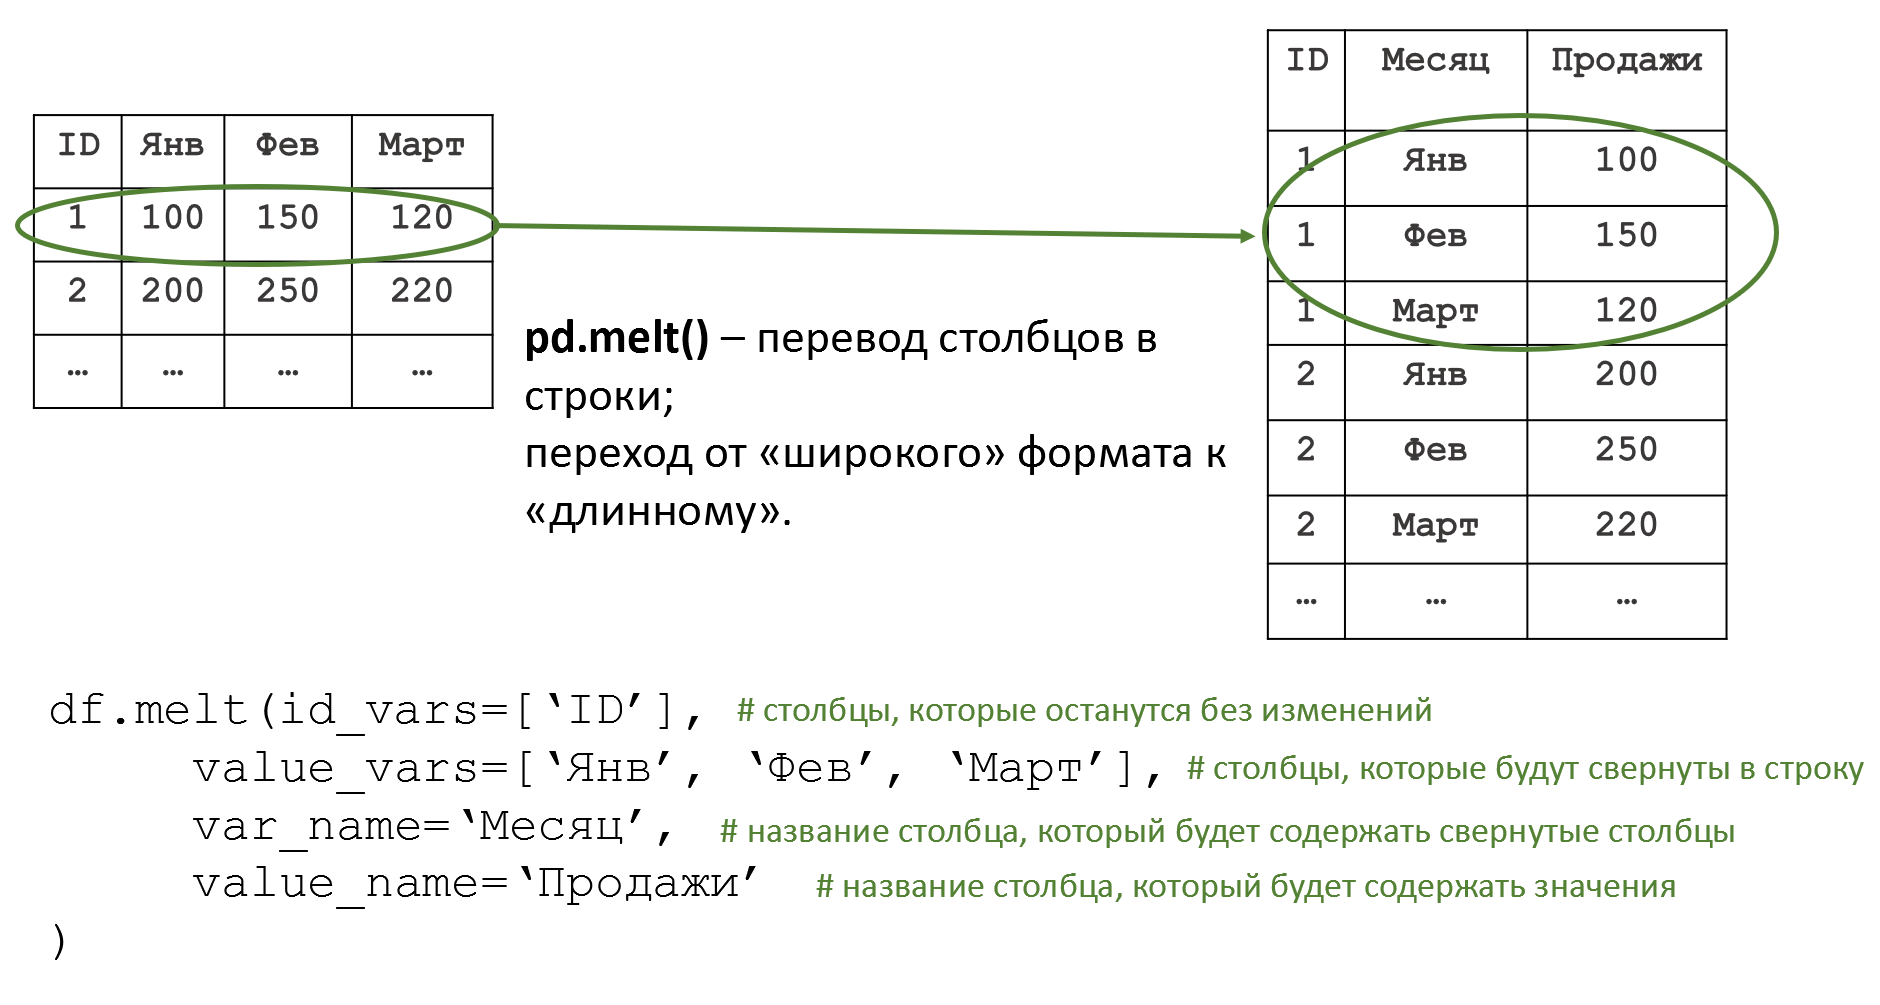

DataFrame.melt() - функция для перевода столбцов в строки, переводит таблицу из "широкого" формата в "длинный".

Синтаксис:

**DataFrame.melt(id_vars, value_vars, value_name='value')**
* id_vars(list, str) - столбцы, которые останутся без изменений
* value_vars(list, str) - столбцы, которые будут сворачиваться в строки.  Если не указано, используются все столбцы, которые не установлены как id_vars .
* var_name(str) - название столбца, который будет содержать свернутые столбцы
* value_name(str) - названия столбца со зачениями

In [ ]:
# пример с картинки
import pandas as pd

df = pd.DataFrame({
    'ID': [1, 2, 3],
    'Январь': [100, 200, 300],
    'Февраль': [150, 250, 350],
    'Март': [120, 220, 320]
})
display(df)  # исходный датафрейм


df_melted1 = df.melt(id_vars=['ID'],
                     var_name='Месяц',
                     value_name='Продажи'
                     ) # тк value_vars не указан, то все столбцы кроме id_vars перешли в строки
display(df_melted1)

# обратное преобразование
df_melt_pivot = df_melted1.pivot(index='ID', columns='Месяц', values='Продажи')
display(df_melt_pivot)

# пример 2
# если не указать id_vars, то в результате будут использованы только колоки из value_vars
# в этом примере столбцы ID, Март просто исчезли, так как не были указаны ни в id_vars, ни в value_vars.
df_melted2 = df.melt(value_vars=['Январь', 'Февраль'],
                     var_name='Месяц',
                     value_name='Продажи')
display(df_melted2)

Практический пример:

от исходного датафрейма нужно перейти к датафрейму с полями - ФИО, Возраст, Школа, Класс

In [ ]:
import pandas as pd
import numpy as np

dict1 = {
        'Школа': ['Школа № 1', 'Школа № 1', 'Школа № 1', 'Школа № 1'],
        'Класс': ['11А', '11Б', '11B', '11Г'],
        'Ученик_0_ФИО': ['Иванов Иван Иванович', 'Куликова Лиза', 'Иванов Петр Максимович', 'Иванова Нина Ивановна'],
        'Ученик_0_Возраст': [17, 17, 17, 16],
        'Ученик_1_ФИО': ['Петров Иван Сергеевич', 'Сидорова Надежда Петровна', 'Андреева Анна Павловна', np.nan],
        'Ученик_1_Возраст': [18, 16, 17, np.nan]}
df = pd.DataFrame(dict1)
display(df)  # исходный датафрейм

dict2 = {'Школа': ['Школа № 1', 'Школа № 1', 'Школа № 1', 'Школа № 1', 'Школа № 1', 'Школа № 1', 'Школа № 1'],
        'Класс': ['11А', '11А', '11Б', '11Б', '11B', '11B', '11Г'],
         'ФИО': ['Иванов Иван Иванович', 'Петров Иван Сергеевич', 'Куликова Лиза', 'Сидорова Надежда Петровна',
                 'Иванов Петр Максимович', 'Андреева Анна Павловна', 'Иванова Нина Ивановна'],
        'Возраст': [17, 18, 17, 16, 17, 17, 16]}
res_df = pd.DataFrame(dict2)
res_df # как должен выглядеть результирующий датафрейм

,Школа,Класс,Ученик_0_ФИО,Ученик_0_Возраст,Ученик_1_ФИО,Ученик_1_Возраст
0,Школа № 1,11А,Иванов Иван Иванович,17,Петров Иван Сергеевич,18.0
1,Школа № 1,11Б,Куликова Лиза,17,Сидорова Надежда Петровна,16.0
2,Школа № 1,11B,Иванов Петр Максимович,17,Андреева Анна Павловна,17.0
3,Школа № 1,11Г,Иванова Нина Ивановна,16,NaN,NaN


,Школа,Класс,ФИО,Возраст
0,Школа № 1,11А,Иванов Иван Иванович,17
1,Школа № 1,11А,Петров Иван Сергеевич,18
2,Школа № 1,11Б,Куликова Лиза,17
3,Школа № 1,11Б,Сидорова Надежда Петровна,16
4,Школа № 1,11B,Иванов Петр Максимович,17
5,Школа № 1,11B,Андреева Анна Павловна,17
6,Школа № 1,11Г,Иванова Нина Ивановна,16


In [ ]:
# Решение по шагам

# 1 - Преобразование данных в "длинный" формат
df_melted = df.melt(id_vars=['Школа', 'Класс'], # какие столбцы останутся без изменений
         var_name="Столбец", # Название всех остальных столбцов попадут сюда
         value_name="Значение столбца" # значения всех остальных столбцов попадут сюда
         )
display(df_melted)

# 2 - разбиваем "Ученик_0_ФИО" на 2 столбца, какой ученик - Ученик_0, какая информация о нем - ФИО
df_melted[["Ученик", "Столбец"]] = df_melted["Столбец"].str.rsplit('_', n=1, expand=True) # n - количество разбиений
display(df_melted)

# 3 - Поворот таблицы (из строк "ФИО" и "Возраст" делаем столбцы)
df_melted = df_melted.pivot_table(index=["Школа", "Класс", "Ученик"], columns="Столбец", values="Значение столбца", aggfunc="first").reset_index()
display(df_melted)  # результат

## pd.pivot - перевод строк в столбцы

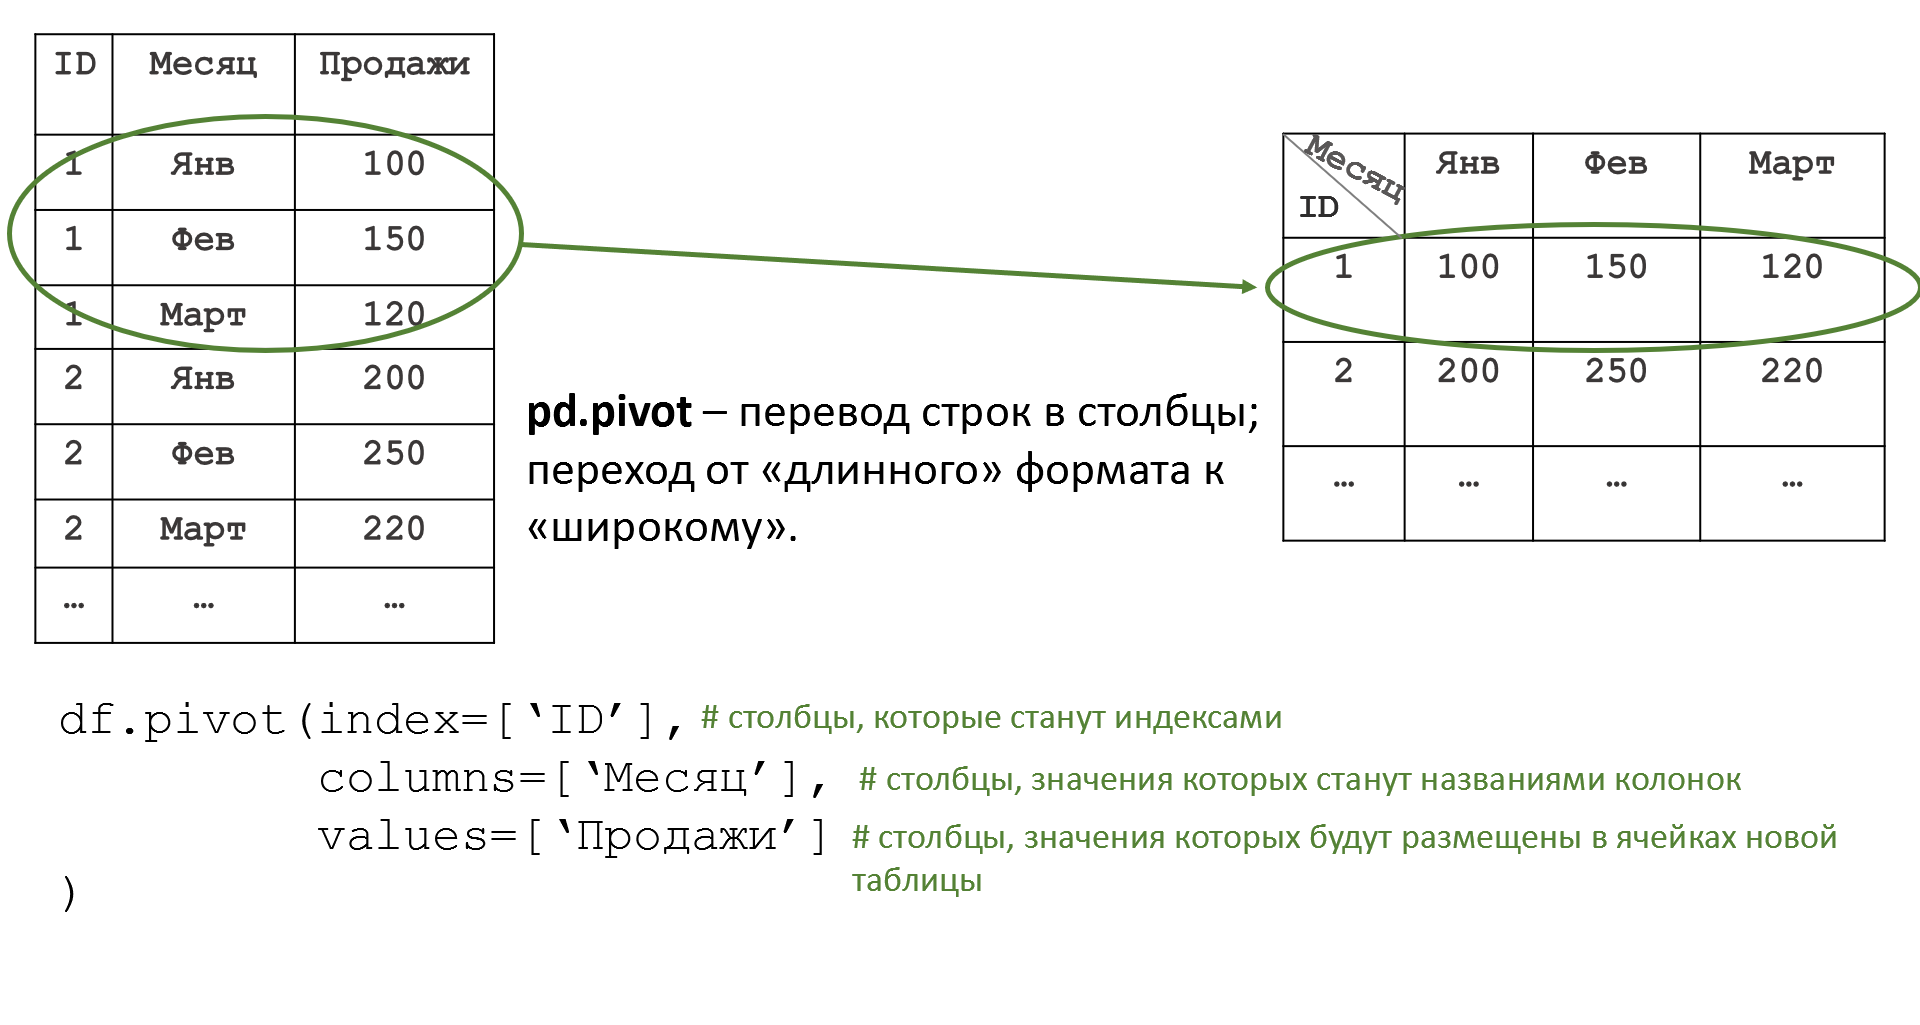

**DataFrame.pivot()**— функция для изменения формы датафрейма, переводит столбцы в строки, переходя от "широкого" формата к "длинному"

Функция не агрегирует, а просто меняет форму таблицы.

pivot() может обрабатывать только уникальные строки, указанные в index и columns . Иначе — ошибка ValueError: Index contains duplicate entries. Если ваши данные содержат дубликаты, используйте pivot_table()

Синтаксиc:

**df.pivot(index=None, columns=None, values=None)**
* index(list, str) - столбец/столбцы, которые станут индексами строк. Если не указан, используется существующий индекс.
* columns(list, str) -  столбец/столбцы, значения которых станут названиями колонок.
* values(list, str) -  столбец/столбцы, значения которых будут размещены в ячейках новой таблицы.

In [ ]:
import pandas as pd


df = pd.DataFrame({
    'Date': ['2025-06-01', '2025-06-01', '2025-06-02', '2025-06-02'],
    'City': ['Moscow', 'Sochi', 'Moscow', 'Sochi'],
    'Time': ['Morning', 'Morning', 'Evening', 'Evening'],
    'Temperature': [20, 25, 22, 27]
})

display(df)  # исходный датафрейм

# пример 1: на каждую дату представлена температура в разных городах
display(df.pivot(index='Date', columns='City', values='Temperature'))

# пример 2: на каждую дату представлена температура в разных городах в разное время суток
display(df.pivot(index=['Date'], columns=['City', 'Time'], values='Temperature'))

,Date,City,Time,Temperature
0,2025-06-01,Moscow,Morning,20
1,2025-06-01,Sochi,Morning,25
2,2025-06-02,Moscow,Evening,22
3,2025-06-02,Sochi,Evening,27


City,Moscow,Sochi
Date,,
2025-06-01,20,25
2025-06-02,22,27


City,Moscow,Sochi,Moscow,Sochi
Time,Morning,Morning,Evening,Evening
Date,,,,
2025-06-01,20.0,25.0,NaN,NaN
2025-06-02,NaN,NaN,22.0,27.0


## pd.pivot_table - создание сводных таблиц

**pd.pivot_table()** - инструмент агрегации и сводки данных в pandas.
Он аналогичен сводным таблицам в Excel и GROUP BY в SQL.
Позволяет группировать данные и применять к ним различные функции (сумму, среднее, количество и т. д.).

Синтаксис:

**pd.pivot_table(data, index, columns, values,  aggfunc='mean')**

* data(pd.DataFrame) - исходный дф
* index(list, str) - столбцы исходного дф, по которым будут формироваться индексы/строки и группироваться данные
* columns(list, str) - столбцы, значения которых станут заголовками столбцов в сводной таблице (по ним тоже будет производиться группировка)
* values(list, str) - числовые столбцы, к которым будут применяться агрегирующие функции
* aggfunc(list, dict, str) - функция/функции агрегации ('sum', 'mean', 'count' и тд), которые применяются к столбцу/столбцам values
* fill_value(по умолчанию fill_value=None) - каким значением заменить пропуски в результирующем дф
* margins(bool, margins=False) - нужно ли добавлять итоги
* margins_name='All',  # название итоговой строки/столбца, если margins=True

In [ ]:
# пример
import pandas as pd

df = pd.DataFrame({
    'Flight': ['SU101', 'SU101', 'SU101', 'DP202', 'DP202', 'UT333', 'UT333', 'SU112', 'SU112'],
    'From': ['Moscow', 'Moscow', 'Moscow', 'Saint Petersburg', 'Saint Petersburg',
             'Moscow', 'Moscow', 'Saint Petersburg', 'Saint Petersburg'],
    'To': ['Sochi', 'Sochi', 'Sochi', 'Kazan', 'Kazan',
           'Kazan', 'Kazan', 'Sochi', 'Sochi'],
    # дата рейса
    'Departure Date': ['2025-06-01', '2025-06-01', '2025-06-01',
                       '2025-06-01', '2025-06-01',
                       '2025-06-01', '2025-06-01', '2025-06-02', '2025-06-02'],
    'Passenger': ['Ivanov', 'Petrov', 'Sidorov',
                  'Kuznetsova', 'Vasiliev',
                  'Smirnov', 'Sokolova', 'Orlova', 'Vlasov'],
    'Class': ['Economy', 'Economy', 'Business',
              'Economy', 'Business',
              'Economy', 'Economy', 'Business', 'Business'],
    'Price': [7500, 8500, 19000,
              8000, 16000,
              7000, 7300, 30000, 40000],
    # дата покупки билета
    'Purchase Date': ['2025-05-01', '2025-05-25', '2025-05-31',
                      '2025-05-20', '2025-05-30',
                      '2025-05-10', '2025-06-01', '2025-05-25', '2025-05-31']
})

display(df) # исходный датафрейм

# Сколько пассажиров летало по каждой дате
display(pd.pivot_table(df, index='Departure Date', values='Passenger', aggfunc='count'))

# Сколько пассажиров летало по каждой даты по каждому направлению
display(pd.pivot_table(df, index=['Departure Date', 'From', 'To'], values='Passenger', aggfunc='count'))

In [ ]:
# продолжение
# Кол-во пассажиров по рейсу и классу
display(pd.pivot_table(df, index='Flight', columns='Class', values='Passenger',
               aggfunc='count'))

# В зависимости от рейса и класса выводим кол-во пассажиров и среднюю цену на билет
display(pd.pivot_table(df, index='Flight', columns='Class', values=['Price', 'Passenger'],
               aggfunc={'Price': 'mean', 'Passenger': 'count'}))

# В зависимости от рейса и класса выводим кол-во пассажиров и среднюю, минимальную, максимальную цену на билет
# если в aggfunc использовать список функций, можно получить мультииндекс по столбцам
test = pd.pivot_table(df, index='Flight', columns='Class', values=['Price', 'Passenger'],
               aggfunc={'Price': ['mean', 'max', 'min'], 'Passenger': 'count'},
                      fill_value=0)
display(test)

# пример с колонками "Total"
display(pd.pivot_table(df, index='Flight', columns='Class', values='Price',
               aggfunc='mean', margins=True, margins_name='Total'))

In [ ]:
# Еще один пример:
# Исходные данные: дф, показывающий как пользователи полузуются соц сетью:
# id-id пользователя, section - секция соц сети, куда заглянул пользователь,time - время, когда была открыта секция
# каждая строка дф - заход пользователя в одну из категорий соц сети + время этого захода
# каждый пользователь может заходить в разные категории несколько раз, а может не заходить совсем

# Задание: Найти самый популярный раздел у тех, кто не смотрит ленту

import numpy as np
import pandas as pd
from datetime import datetime

# генерация датафрейма
def random_date(start, end):
    pattern = '%Y-%m-%d'
    start = datetime.strptime(start, pattern).timestamp()
    end = datetime.strptime(end, pattern).timestamp()
    return(np.random.randint(start, end))

dt_size = 1000 #размер дата сета
id = np.random.randint(1, 51, dt_size)
cats = ['music', 'message', 'feed', 'photo']
section = np.random.choice(cats, dt_size, replace=True, p=[0.3, 0.30, 0.10, 0.30])
time = [random_date('2021-02-15', '2022-08-21') for _ in range(0, dt_size)]

dt = pd.DataFrame({'id': id, 'section': section, 'time': time})
display(dt.head()) # дф с исходными данными

#cоздание сводной таблицы
actions = pd.pivot_table(
    dt, # дф, который обрабатываем
    index='id', # какой столбец из исходного дф будет образовывать строки(индексы)
    columns='section', # какие столбцы из исходного дф будут формировать столбцы нового дф
    values='time', # что формирует значения, что на пересечение строки и столбца(к какому столбцу будет применяться агрегатная функция)
    aggfunc='count', # какая агрегатная функция применяется к столбцу values
    fill_value=0 # чем заполнится поле, если нет пересечения индекса и столбца
)
# получился дф, в котором видно сколько раз каждый пользователь открывал секции соц сети
display(actions.head(10))

# список пользователей, которые не пользуются новостями в соц сетях
actions[actions['feed'] == 0]

# сколько раз пользовались другими секциями соцсети
actions[actions['feed'] == 0].sum().sort_values(ascending=False)

# Доп задание: Определить, кто дольше всех пользуется продуктом,
# т.е у какого человека самая большая разница во времени между первой и последней записью
times = dt.groupby('id', as_index=False).agg({'time': ['min', 'max']})

times.columns = times.columns.droplevel(0)
times['raz'] = times['max'] - times['min']
display(times[times['raz']  == times['raz'].max()])

## set_index, reset_index - cтолбец в индекс и наоборот

**DataFrame.set_index()** — назначить один или несколько столбцов как индекс

Синтаксис:

DataFrame.set_index(keys, *, drop=True, append=False, inplace=False, verify_integrity=False)
* keys(str, list) - какой столбец станет индексом или какие столбцы станут мультииндексом
* drop(bool, по умолчанию True) - нужно ли удалять колонку из тела датафрейма после того, как она стала индексом (по умолчанию да, нужно)
* append(bool, по умолчанию False) - Добавить ли новый индекс в дополнение к существующему (то есть создать MultiIndex), вместо замены текущего.(по умолчанию текущий индекс заменится)
* inplace(bool, по умолчанию False) - изменять ли DataFrame напрямую; False - создаёт и возвращает новый DataFrame
* verify_integrity(bool, по умолчанию False) - нужна ли проверка, что новый индекс не содержит дубликатов.(True → выбросит ошибку, если будут повторы; False - допустит повторы в индексе)

In [1]:
import pandas as pd

df = pd.DataFrame({
    'id': [101, 102, 103], 'name': ['Аня', 'Борис', 'Вика'], 'score': [90, 85, 95]
})
display(df) # исходный датафрейм
df2 = df.set_index('id')
display(df2) # после переноса столбца id в индексы датафрейма


,id,name,score
0,101,Аня,90
1,102,Борис,85
2,103,Вика,95


,name,score
id,,
101,Аня,90
102,Борис,85
103,Вика,95


**DataFrame.reset_index()** — сбросить индекс обратно в обычный столбец

Синтаксис:

DataFrame.reset_index(level=None, *, drop=False, inplace=False, col_level=0, col_fill='', allow_duplicates=\<no_default\>, names=None)

* level - позволяет сбросить только определённые уровни индекса, если он многоуровневый (MultiIndex), level=None - поведение по умолчанию, сбрасывает весь индекс, int, str или список — сбрасывает определённые уровни

* drop(bool) - определяет, нужно ли сохранять индекс как столбец в DataFrame, по умолчанию False - сохраняет индекс как столбец в DataFrame

* inplace(bool) - изменить исходный DataFrame или вернуть копию

* allow_duplicates(bool) - разрешить ли дублирующиеся имена столбцов после сброса индекса, True — допускает дубликаты

* col_level(int, str) - уровень колонок, куда поместить сброшенный индекс (для MultiIndex)

* col_fill(str) - заполнитель для остальных уровней MultiIndex колонок

* names(str, list) - имена новых столбцов вместо индекса


In [8]:
# пример 1


df = pd.DataFrame({
    'Date': ['2025-07-01', '2025-07-01', '2025-07-02', '2025-07-02'],
    'City': ['Moscow', 'Sochi', 'Moscow', 'Sochi'],
    'Temperature': [25, 28, 24, 29]
})

df_grouped = df.groupby(['Date', 'City']).mean(numeric_only=True)
display(df_grouped) # исходный датафрейм

display(df_grouped.reset_index()) # поведение функции по умолчанию

display(df_grouped.reset_index(level=0)) # сбросить только нулевой уровень индекса

display(df_grouped.reset_index(level=[0, 1])) # сбросить 0, 1 уровень индекса

display(df_grouped.reset_index(drop=True))  # сбрасывает индекс без добавления его в столбцы, индекс заменяется обычным RangeIndex, и Date, City теряются.

Temperature
Date       City               
2025-07-01 Moscow         25.0
           Sochi          28.0
2025-07-02 Moscow         24.0
           Sochi          29.0

,Date,City,Temperature
0,2025-07-01,Moscow,25.0
1,2025-07-01,Sochi,28.0
2,2025-07-02,Moscow,24.0
3,2025-07-02,Sochi,29.0


,Date,Temperature
City,,
Moscow,2025-07-01,25.0
Sochi,2025-07-01,28.0
Moscow,2025-07-02,24.0
Sochi,2025-07-02,29.0


,Date,City,Temperature
0,2025-07-01,Moscow,25.0
1,2025-07-01,Sochi,28.0
2,2025-07-02,Moscow,24.0
3,2025-07-02,Sochi,29.0


,Temperature
0,25.0
1,28.0
2,24.0
3,29.0


In [ ]:
# пример 2
df = pd.DataFrame({
    'Date': ['2025-07-01', '2025-07-01', '2025-07-02', '2025-07-02'],
    'City': ['Moscow', 'Sochi', 'Moscow', 'Sochi'],
    'Time': ['Morning', 'Morning', 'Evening', 'Evening'],
    'Temperature': [20, 25, 22, 27],
    'Humidity': [60, 55, 65, 50]  # влажность
})
pivot_df = df.pivot(index='Date', columns=['City', 'Time'], values=['Temperature', 'Humidity'])
display(pivot_df) # датафрейм с мультииндексами для примера

# обычное поведение, сбрасывает индекс строк (Date) в отдельный столбец, а мультииндекс в колонках не меняется
display(pivot_df.reset_index())

# Cброшенный индекс Date встал в верхний уровень колонок, все остальные уровни заполнились строкой col_fill
display(pivot_df.reset_index(col_level=0, col_fill='Index'))

## stack и unstack - иерархии индекса и их раскрытие

**DataFrame.stack()** - опускает один из уровней столбцов в индекс строк.

**DataFrame.unstack()** - поднимает один из уровней индекса строк в заголовки столбцов.

У функций есть необязательный параметр *level*, который позволяет управлять, какой именно уровень нужно перенести.

In [ ]:
# Пример

data = {
    ('Math', 'Spring'): [5, 3],
    ('Math', 'Fall'): [4, 5],
    ('History', 'Spring'): [4, 5],
    ('History', 'Fall'): [5, 4],
}

df = pd.DataFrame(data, index=['Alice', 'Bob'])
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.name = 'Student'
display(df)  # исходный датафрейм

stacked1 = df.stack(0) # перенесли верхний уровень столбцов(предмет) в индексы
display(stacked1)

stacked2 = df.stack(1) # перенесли нижний уровень столбцов(семестр) в индексы
display(stacked2)

display(stacked2.unstack()) # обратный перенос индексов в столбцы -> возвращение к исходному дф